# Investigate Pararel data

In [1]:
import os
os.chdir('..') 
os.getcwd()

'/cephyr/users/lovhag/Alvis/projects/pararel'

In [2]:
import pandas as pd
import os 
import pickle
import numpy as np

from pararel.consistency import utils
from pararel.consistency.lm_pipeline import parse_prompt

/mimer/NOBACKUP/groups/snic2021-23-309/envs/venv_pararel/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We can for the analysis switch between the original datafile `trex_lms_vocab` and our corresponding deduplicated datafile `trex_lms_vocab_deduplicated`.

In [9]:
data_path = "/cephyr/users/lovhag/Alvis/projects/pararel/data"
lama_path = os.path.join(data_path, "trex_lms_vocab")
graph_path = os.path.join(data_path, "pattern_data", "graphs")

In [4]:
relation_names = {"P17": "located-in",
             "P19": "born-in", 
             "P20": "died-in", 
             "P27": "citizen-of",
             "P30": "located-in-continent",
             "P36": "capital-of",
             "P37": "official-language",
             "P39": "has-position",
             "P47": "shares-border-with",
             "P101": "specializes-in",
             "P103": "native-language",
             "P106": "is-a-by-profession",
             "P108": "works-for",
             "P127": "owned-by",
             "P131": "located-in",
             "P136": "plays-music",
             "P138": "named-after",
             "P140": "affiliated-with-religion",
             "P159": "headquarter-in",
             "P176": "produced-by",
             "P178": "developed-by",
             "P190": "twin-city-of",
             "P264": "represented-by-music-label",
             "P276": "located-in",
             "P279": "subclass-of", 
             "P361": "part-of",
             "P364": "original-language",
             "P407": "written-in-language",
             "P413": "plays-in-position",
             "P449": "originally-aired-on",
             "P463": "member-of",
             "P495": "created-in",
             "P530": "has-diplomatic-relations-with",
             "P740": "founded-in",
             "P937": "worked-in",
             "P1001": "legal-term-in",
             "P1303": "is-a-player",
             "P1376": "capital-of",
             "P1412": "communicated-in"}

In [5]:
investigated_relations = ["P937","P1412","P127","P103","P276","P159","P140","P136","P495","P17","P361","P36","P740","P264","P407","P138","P30","P131","P176","P449","P279","P19","P101","P364","P106","P1376","P178","P37","P413","P27","P20"]
print(investigated_relations)

['P937', 'P1412', 'P127', 'P103', 'P276', 'P159', 'P140', 'P136', 'P495', 'P17', 'P361', 'P36', 'P740', 'P264', 'P407', 'P138', 'P30', 'P131', 'P176', 'P449', 'P279', 'P19', 'P101', 'P364', 'P106', 'P1376', 'P178', 'P37', 'P413', 'P27', 'P20']


## Systematic analysis

In [10]:
duplicate_subj_data = pd.DataFrame()
stat_data = pd.DataFrame()
for relation in investigated_relations:
    try:
        data = utils.read_jsonl_file(os.path.join(lama_path, relation + ".jsonl"))
    except:
        print(f"There was an error reading the data for {os.path.join(lama_path, relation + '.jsonl')}. Skipping.")
        continue

    tmp_data = pd.DataFrame()
    for val in data:
        val["relation"] = relation
        val["relation_name"] = relation_names[relation]
        tmp_data = tmp_data.append(val, ignore_index=True)
        
    nbr_matching = 0
    nbr_stupid_matching = 0
    duplicated_sub_labels = []    
    for sub_label in tmp_data.sub_label.unique():
        matching = tmp_data[tmp_data.sub_label==sub_label]
        if len(matching) > 1:
            duplicated_sub_labels.append(sub_label)
            nbr_matching += len(matching)
            # also look for pure duplicates (both subj label and obj label matching)
            tmp_sub_data = tmp_data[tmp_data.sub_label==sub_label].copy()
            for obj_label in tmp_sub_data.obj_label.unique():
                nbr_stupid_matching += len(tmp_sub_data[tmp_sub_data.obj_label==obj_label])-1
    stat_data = stat_data.append({"relation": relation, 
                                  "relation_name": relation_names[relation],
                                  "nbr": int(len(data)),
                                  "nbr_duplicates": int(nbr_matching),
                                  "nbr_stupid_duplicates": int(nbr_stupid_matching)},
                                  ignore_index=True)
    
    duplicated_mask = tmp_data.sub_label.isin(duplicated_sub_labels)
    duplicate_subj_data = duplicate_subj_data.append(tmp_data[duplicated_mask].sort_values(by=["sub_label"]), ignore_index=True)

stat_data["nbr"] = stat_data["nbr"].astype('int')
stat_data["nbr_duplicates"] = stat_data["nbr_duplicates"].astype('int')
stat_data["nbr_stupid_duplicates"] = stat_data["nbr_stupid_duplicates"].astype('int')
stat_data = stat_data.set_index("relation").sort_index()
stat_data = stat_data[['relation_name', 'nbr', 'nbr_duplicates', 'nbr_stupid_duplicates']]
stat_data = stat_data.sort_index(key=lambda row: [int(val.replace("P","")) for val in row])
stat_data

There was an error reading the data for /cephyr/users/lovhag/Alvis/projects/pararel/data/trex_lms_vocab/P37.jsonl. Skipping.


,relation_name,nbr,nbr_duplicates,nbr_stupid_duplicates
relation,,,,
P17,located-in,910,0,0
P19,born-in,779,0,0
P20,died-in,817,0,0
P27,citizen-of,958,0,0
P30,located-in-continent,955,0,0
P36,capital-of,457,0,0
P101,specializes-in,519,0,0
P103,native-language,917,0,0
P106,is-a-by-profession,821,0,0


In [11]:
stat_data

,relation_name,nbr,nbr_duplicates,nbr_stupid_duplicates
relation,,,,
P17,located-in,910,0,0
P19,born-in,779,0,0
P20,died-in,817,0,0
P27,citizen-of,958,0,0
P30,located-in-continent,955,0,0
P36,capital-of,457,0,0
P101,specializes-in,519,0,0
P103,native-language,917,0,0
P106,is-a-by-profession,821,0,0


In [41]:
print(stat_data.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &               relation\_name &  nbr &  nbr\_duplicates &  nbr\_stupid\_duplicates \\
relation &                             &      &                 &                        \\
\midrule
P17      &                  located-in &  912 &               2 &                      0 \\
P19      &                     born-in &  779 &               0 &                      0 \\
P20      &                     died-in &  817 &               0 &                      0 \\
P27      &                  citizen-of &  958 &               0 &                      0 \\
P30      &        located-in-continent &  959 &               4 &                      0 \\
P36      &                  capital-of &  471 &              14 &                      1 \\
P37      &           official-language &  900 &             280 &                      0 \\
P101     &              specializes-in &  571 &              52 &                      0 \\
P103     &             native-language & 

In [12]:
stat_data.nbr.sum()

21830

In [25]:
duplicate_subj_data[duplicate_subj_data.relation=="P449"]

,obj_label,relation,relation_name,sub_label,uuid
276,NBC,P449,originally-aired-on,Alfred Hitchcock Presents,4f9db489-5667-4c43-9810-e57f61d8ab30
277,CBS,P449,originally-aired-on,Alfred Hitchcock Presents,64b9c063-dbab-4fb0-9e43-5c1ff67caf45
278,NBC,P449,originally-aired-on,Alfred Hitchcock Presents,1e510088-f748-4972-b326-b0d4169402d0
279,CBS,P449,originally-aired-on,Down You Go,044e086f-26a6-4421-a6c7-a65710748ba1
280,NBC,P449,originally-aired-on,Down You Go,e1b4880e-7cc2-464e-9879-2982085f4ee9
281,NBC,P449,originally-aired-on,Gambit,f937db7c-018a-45e8-8cf0-b62bc82c4544
282,CBS,P449,originally-aired-on,Gambit,cf421677-f1c7-4014-be63-65c538b608fd
283,NBC,P449,originally-aired-on,Underdog,0e40459c-47ac-4842-9d51-1bf248d75479
284,CBS,P449,originally-aired-on,Underdog,ab9fd026-c25b-4a4b-a7f0-502bd7cdb361


In [34]:
duplicate_subj_data.to_csv("duplicated_subjects_data.csv", index=False)

In [67]:
duplicate_subj_data.relation.unique()

array(['P937', 'P1412', 'P103', 'P276', 'P159', 'P140', 'P136', 'P495',
       'P17', 'P361', 'P36', 'P264', 'P407', 'P138', 'P30', 'P176',
       'P449', 'P279', 'P101', 'P364', 'P1376', 'P178', 'P37'],
      dtype=object)

## Check number of answer alternatives for original and deduplicated data

In [7]:
data_paths = {"original": os.path.join(data_path, "trex_lms_vocab"), "deduplicated": os.path.join(data_path, "trex_lms_vocab_deduplicated")}
all_objects = {}
for key, path in data_paths.items():
    all_objects[key] = {}
    for relation in investigated_relations:
        try:
            data = utils.read_jsonl_file(os.path.join(path, relation + '.jsonl'))
        except:
            print(f"There was an error reading the data for {os.path.join(path, relation + '.jsonl')}. Skipping.")
            continue
        
        all_objects[key][relation] = list(set([x['obj_label'] for x in data]))
        

There was an error reading the data for /cephyr/users/lovhag/Alvis/projects/pararel/data/trex_lms_vocab_deduplicated/P37.jsonl. Skipping.


In [12]:
[obj for obj in all_objects['original']["P101"] if obj not in all_objects['deduplicated']["P101"]]

['asteroid', 'comet', 'folklore']

In [17]:
for relation in investigated_relations:
    # skip the relation that has been dropped for the deduplicated data
    if relation=="P37":
        continue
    print(f"Relation {relation} number of options")
    print(f"'original': {len(all_objects['original'][relation])}")
    print(f"'deduplicated': {len(all_objects['deduplicated'][relation])}") 
    print()
    print("Removed options:")
    print([obj for obj in all_objects['original'][relation] if obj not in all_objects['deduplicated'][relation]])
    print("-----------------")

Relation P937 number of options
'original': 93
'deduplicated': 92

Removed options:
['Cincinnati']
-----------------
Relation P1412 number of options
'original': 38
'deduplicated': 38

Removed options:
[]
-----------------
Relation P127 number of options
'original': 194
'deduplicated': 194

Removed options:
[]
-----------------
Relation P103 number of options
'original': 30
'deduplicated': 30

Removed options:
[]
-----------------
Relation P276 number of options
'original': 262
'deduplicated': 242

Removed options:
['Michigan', 'Austria', 'Luxembourg', 'Gujarat', 'Albania', 'Mongolia', 'Latvia', 'Azerbaijan', 'Wisconsin', 'Ghana', 'California', 'Armenia', 'Canada', 'Egypt', 'Bahrain', 'Kazakhstan', 'Texas', 'Switzerland', 'Iran', 'Levant']
-----------------
Relation P159 number of options
'original': 190
'deduplicated': 189

Removed options:
['Golden']
-----------------
Relation P140 number of options
'original': 10
'deduplicated': 10

Removed options:
[]
-----------------
Relation P13

## Check whether Atlas is more inconsistent for inconsistent subject-object alternatives

In [54]:
from collections import defaultdict
import wandb
import glob

from pararel.consistency.encode_consistency_probe_from_file import read_atlas_results
from pararel.consistency.encode_consistency_probe import analyze_results
from pararel.consistency.utils import read_jsonl_file, read_graph

In [36]:
duplicate_subj_data = pd.read_csv("duplicated_subjects_data.csv")
duplicate_subj_data

,obj_label,relation,relation_name,sub_label,uuid
0,Bern,P937,worked-in,Albert Einstein,e4f33b6d-6cda-4a73-9bd3-5668f884fe0d
1,Berlin,P937,worked-in,Albert Einstein,dd080e5d-6e84-46a9-8e2d-33edc11cf03f
2,Berlin,P937,worked-in,Carl Philipp Emanuel Bach,e63ed2f9-ab68-43e9-a0b8-2a2ab1616c37
3,Hamburg,P937,worked-in,Carl Philipp Emanuel Bach,841751bd-aefc-4e79-a3c5-b90c94336a05
4,Vienna,P937,worked-in,Christoph Willibald von Gluck,c2ffb80f-b0a7-4c8a-975d-5d054232b027
...,...,...,...,...,...
642,Russian,P37,official-language,World Health Organization,b46343e0-0f68-4813-bf91-438f515210e4
643,Russian,P37,official-language,Zhovti Vody,e92763d7-4e82-4e31-885e-525836bc939e
644,Ukrainian,P37,official-language,Zhovti Vody,71d372dc-8420-4c9d-b932-3fe1e673efa7
645,German,P37,official-language,canton of Bern,7c5bd78d-c5fa-4b6c-9b44-a86d68a09b9f


In [64]:
for relation in investigated_relations:
    if relation not in duplicate_subj_data.relation.values:
        continue
    patterns_graph = read_graph(f"/cephyr/users/lovhag/Alvis/projects/pararel/data/pattern_data/graphs/{relation}.graph")

    # TODO: PREDICTION FILE READING HERE
    lm_results_path = glob.glob(f'/cephyr/users/lovhag/Alvis/projects/atlas/data/experiments/pararel-eval-{relation}*/{relation}-step-0.jsonl')
    if len(lm_results_path) == 0:
        print(f"No Atlas data for relation {relation}. Skipping.")
        continue
    assert len(lm_results_path) == 1
    data = read_jsonl_file(lm_results_path[0])
    lm_results = defaultdict(dict)

    for dp in data:
        prompt, subj, obj, prediction = read_atlas_results(dp)
        # ALTERED: only save subjects with inconsistent gold labels
        if subj in duplicate_subj_data.sub_label.values:
            lm_results[prompt][subj] = (prediction,obj)

    config = dict(
            pattern=relation,
            lm="atlas-base"
        )
    wandb.init(
            name=f'{relation}_consistency_probe_atlas-base_duplicates',
            project="consistency",
            tags=[relation, 'probe', 'duplicates'],
            config=config,
        )

    analyze_results(lm_results, patterns_graph)

avg_consistency_by_edge_out,0.70956
avg_entropy,0.36634
both_consistency,0.71296
consistency,0.70833
consistent_subjects,0.5
knowledgable_consistency,0.5625
lexical_consistency,0.66667
no_change_consistency,-1
std_entropy,0.43739
successful_patterns,1.0
successful_subjects,0.66667


overall 170 240 0.7083333333333334
lexical 16 24 0.6666666666666666
both 154 216 0.7129629629629629


avg_consistency_by_edge_out,0.70956
avg_entropy,0.36634
both_consistency,0.71296
consistency,0.70833
consistent_subjects,0.5
knowledgable_consistency,0.5625
lexical_consistency,0.66667
no_change_consistency,-1
std_entropy,0.43739
successful_patterns,1.0
successful_subjects,0.66667


overall 100 168 0.5952380952380952
syntactic 4 6 0.6666666666666666
lexical 10 12 0.8333333333333334
both 20 36 0.5555555555555556


avg_consistency_by_edge_out,0.60571
avg_entropy,0.58524
both_consistency,0.55556
consistency,0.59524
consistent_subjects,0.33333
knowledgable_consistency,0.32143
lexical_consistency,0.83333
no_change_consistency,-1
std_entropy,0.45579
successful_patterns,0.5
successful_subjects,0.33333


overall 36 36 1.0
lexical 12 12 1.0


avg_consistency_by_edge_out,1.0
avg_entropy,0.0
both_consistency,-1
consistency,1.0
consistent_subjects,1.0
knowledgable_consistency,1.0
lexical_consistency,1.0
no_change_consistency,-1
std_entropy,0.0
successful_patterns,1.0
successful_subjects,0.66667


overall 40 54 0.7407407407407407
both 40 54 0.7407407407407407


avg_consistency_by_edge_out,0.74074
avg_entropy,0.0
both_consistency,0.74074
consistency,0.74074
consistent_subjects,0.74074
knowledgable_consistency,0.78571
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.0
successful_patterns,1.0
successful_subjects,0.51852


overall 252 270 0.9333333333333333
lexical 18 18 1.0
both 72 78 0.9230769230769231


avg_consistency_by_edge_out,0.9418
avg_entropy,0.15098
both_consistency,0.92308
consistency,0.93333
consistent_subjects,0.66667
knowledgable_consistency,0.9
lexical_consistency,1.0
no_change_consistency,-1
std_entropy,0.23062
successful_patterns,1.0
successful_subjects,0.66667


overall 14 60 0.23333333333333334
both 8 20 0.4


avg_consistency_by_edge_out,0.25714
avg_entropy,0.50506
both_consistency,0.4
consistency,0.23333
consistent_subjects,0.0
knowledgable_consistency,0.16667
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.45685
successful_patterns,0.5
successful_subjects,0.6


overall 12 30 0.4
both 12 30 0.4


avg_consistency_by_edge_out,0.6
avg_entropy,0.6473
both_consistency,0.4
consistency,0.4
consistent_subjects,0.0
knowledgable_consistency,0
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.45771
successful_patterns,0.0
successful_subjects,0.0


overall 544 544 1.0
lexical 88 88 1.0
both 216 216 1.0


avg_consistency_by_edge_out,1.0
avg_entropy,0.0
both_consistency,1.0
consistency,1.0
consistent_subjects,1.0
knowledgable_consistency,1.0
lexical_consistency,1.0
no_change_consistency,-1
std_entropy,0.0
successful_patterns,0.47059
successful_subjects,0.5


overall 8 12 0.6666666666666666
both 2 4 0.5


avg_consistency_by_edge_out,0.6875
avg_entropy,0.33333
both_consistency,0.5
consistency,0.66667
consistent_subjects,0.5
knowledgable_consistency,1.0
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.4714
successful_patterns,1.0
successful_subjects,0.5


overall 48 60 0.8


avg_consistency_by_edge_out,0.8
avg_entropy,0.0
both_consistency,-1
consistency,0.8
consistent_subjects,0.8
knowledgable_consistency,0.6
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.0
successful_patterns,1.0
successful_subjects,0.5


overall 5638 6188 0.9111182934712346
syntactic 118 136 0.8676470588235294
lexical 466 476 0.9789915966386554
both 882 952 0.9264705882352942


avg_consistency_by_edge_out,0.91144
avg_entropy,0.1776
both_consistency,0.92647
consistency,0.91112
consistent_subjects,0.76471
knowledgable_consistency,0.91112
lexical_consistency,0.97899
no_change_consistency,-1
std_entropy,0.3375
successful_patterns,1.0
successful_subjects,1.0


overall 116 272 0.4264705882352941
lexical 14 20 0.7
both 60 136 0.4411764705882353


avg_consistency_by_edge_out,0.59591
avg_entropy,0.73662
both_consistency,0.44118
consistency,0.42647
consistent_subjects,0.0
knowledgable_consistency,0.42647
lexical_consistency,0.7
no_change_consistency,-1
std_entropy,0.29492
successful_patterns,0.29412
successful_subjects,1.0


overall 2380 2940 0.8095238095238095
syntactic 76 112 0.6785714285714286
no change 158 168 0.9404761904761905
both 516 644 0.8012422360248447
No Atlas data for relation P138. Skipping.


avg_consistency_by_edge_out,0.83218
avg_entropy,0.32195
both_consistency,0.80124
consistency,0.80952
consistent_subjects,0.5
knowledgable_consistency,0.82778
lexical_consistency,-1
no_change_consistency,0.94048
std_entropy,0.37833
successful_patterns,1.0
successful_subjects,0.85714


overall 288 300 0.96
both 50 50 1.0


avg_consistency_by_edge_out,0.96056
avg_entropy,0.0551
both_consistency,1.0
consistency,0.96
consistent_subjects,0.92
knowledgable_consistency,0.97826
lexical_consistency,-1
no_change_consistency,-1
std_entropy,0.21808
successful_patterns,1.0
successful_subjects,0.92


overall 872 1056 0.8257575757575758
lexical 94 112 0.8392857142857143
both 190 224 0.8482142857142857
No Atlas data for relation P449. Skipping.


avg_consistency_by_edge_out,0.82597
avg_entropy,0.19001
both_consistency,0.84821
consistency,0.82576
consistent_subjects,0.75
knowledgable_consistency,0.82576
lexical_consistency,0.83929
no_change_consistency,-1
std_entropy,0.36855
successful_patterns,1.0
successful_subjects,1.0


overall 24 24 1.0
lexical 4 4 1.0
both 8 8 1.0


avg_consistency_by_edge_out,1.0
avg_entropy,0.0
both_consistency,1.0
consistency,1.0
consistent_subjects,1.0
knowledgable_consistency,0
lexical_consistency,1.0
no_change_consistency,-1
std_entropy,0.0
successful_patterns,0.0
successful_subjects,0.0


overall 2676 3744 0.7147435897435898
syntactic 64 96 0.6666666666666666
lexical 328 432 0.7592592592592593
both 916 1296 0.7067901234567902


avg_consistency_by_edge_out,0.71705
avg_entropy,0.48504
both_consistency,0.70679
consistency,0.71474
consistent_subjects,0.33333
knowledgable_consistency,0.66538
lexical_consistency,0.75926
no_change_consistency,-1
std_entropy,0.40595
successful_patterns,1.0
successful_subjects,0.83333


overall 72 90 0.8
syntactic 16 24 0.6666666666666666
lexical 24 24 1.0
no change 16 18 0.8888888888888888
both 16 24 0.6666666666666666


avg_consistency_by_edge_out,0.81111
avg_entropy,0.21577
both_consistency,0.66667
consistency,0.8
consistent_subjects,0.66667
knowledgable_consistency,0.8
lexical_consistency,1.0
no_change_consistency,0.88889
std_entropy,0.40366
successful_patterns,1.0
successful_subjects,1.0


overall 1092 1092 1.0
syntactic 24 24 1.0
lexical 84 84 1.0
both 168 168 1.0


avg_consistency_by_edge_out,1.0
avg_entropy,0.0
both_consistency,1.0
consistency,1.0
consistent_subjects,1.0
knowledgable_consistency,1.0
lexical_consistency,1.0
no_change_consistency,-1
std_entropy,0.0
successful_patterns,1.0
successful_subjects,0.66667


overall 1034 1200 0.8616666666666667
lexical 80 90 0.8888888888888888
no change 30 30 1.0
both 172 190 0.9052631578947369
No Atlas data for relation P37. Skipping.


In [68]:
wandb.finish()

avg_consistency_by_edge_out,0.86847
avg_entropy,0.26684
both_consistency,0.90526
consistency,0.86167
consistent_subjects,0.4
knowledgable_consistency,0.9375
lexical_consistency,0.88889
no_change_consistency,1.0
std_entropy,0.28937
successful_patterns,1.0
successful_subjects,0.4


## Analyze wandb results

In [2]:
results = pd.read_csv("results.csv")
results_duplicated = pd.read_csv("duplicate_results.csv")

In [3]:
results_duplicated.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'lm', 'pattern', 'all_edges', 'avg_consistency_by_edge_out',
       'avg_entropy', 'both_consistency', 'both_edges', 'consistency',
       'consistent_subjects', 'group-unacc', 'knowledgable_consistency',
       'lama_acc', 'lama_group_acc', 'lexical_consistency', 'lexical_edges',
       'n_patterns', 'no_change_consistency', 'std_entropy',
       'successful_patterns', 'successful_subjects', 'syntactic_consistency',
       'syntactic_edges', 'total', 'total_both', 'total_lex', 'total_no',
       'total_syn', 'unknowledgable_consistency'],
      dtype='object')

In [5]:
results_duplicated = results_duplicated[["pattern","consistency","knowledgable_consistency","total","unknowledgable_consistency"]]
results = results[["pattern","consistency","knowledgable_consistency","total","unknowledgable_consistency"]]
comp_results = results_duplicated.merge(results, how = 'inner', on = ['pattern'], suffixes=('_dup',''))
comp_results.reindex(['pattern']+sorted(comp_results.columns.drop("pattern")), axis=1)

,pattern,consistency,consistency_dup,knowledgable_consistency,knowledgable_consistency_dup,total,total_dup,unknowledgable_consistency,unknowledgable_consistency_dup
0,P178,0.961259,0.861667,0.962666,0.937500,139440,1200,0.758333,0.811111
1,P1376,0.947881,1.000000,0.953792,1.000000,31850,1092,0.879906,1.000000
2,P364,0.938203,0.800000,0.944244,0.800000,22590,90,0.891954,0.000000
3,P101,0.744536,0.714744,0.761913,0.665385,84552,3744,0.657265,0.961538
4,P279,0.785820,1.000000,0.827748,0.000000,10776,24,0.713998,1.000000
5,P176,0.971056,0.825758,0.971117,0.825758,120648,1056,0.968013,0.000000
6,P30,0.934866,0.960000,0.939037,0.978261,11484,300,0.757576,0.750000
7,P407,0.900369,0.809524,0.903143,0.827778,176190,2940,0.832612,0.700000
8,P264,0.644231,0.426471,0.644231,0.426471,14144,272,0.000000,0.000000
9,P36,0.911067,0.911118,0.917447,0.911118,84266,6188,0.732830,0.000000


<AxesSubplot: xlabel='pattern'>

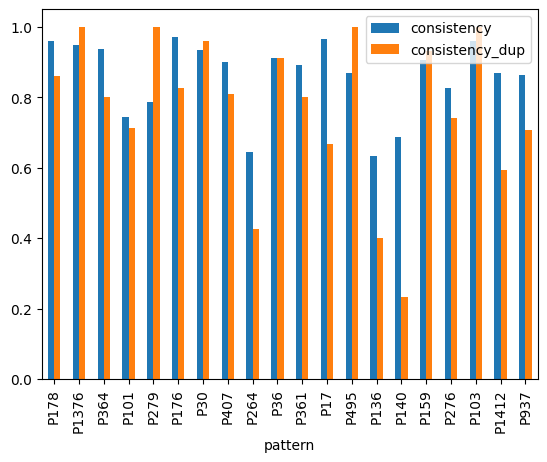

In [6]:
comp_results.plot.bar(x="pattern", y=["consistency","consistency_dup"])

<AxesSubplot: xlabel='pattern'>

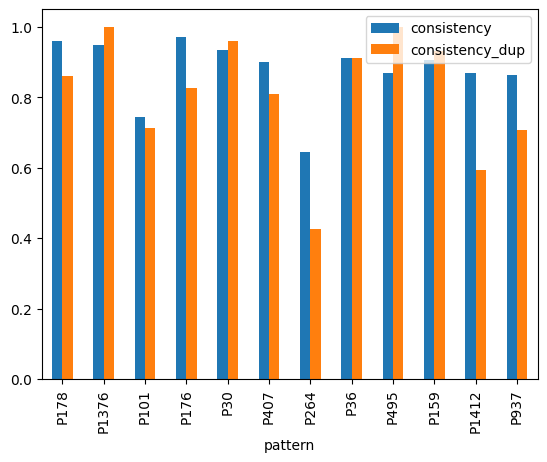

In [7]:
comp_results[comp_results.total_dup>100].plot.bar(x="pattern", y=["consistency","consistency_dup"])